# Projeto 4 de Álgebra Linear Numérica

### Alunos:
* Isaías Gouvêa Gonçalves
* Gustavo Luciano dos santos

### Matrizes Aleatórias

In [3]:
# Importando dependências
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [4]:
# Função para gerar matriz aleatória normal

def matrix(m, n):
    return np.random.normal(size=(m, n), loc=0, scale=1)


### Exercício ***1.a)***

Gerando um histograma das normas para vários valores de $m$



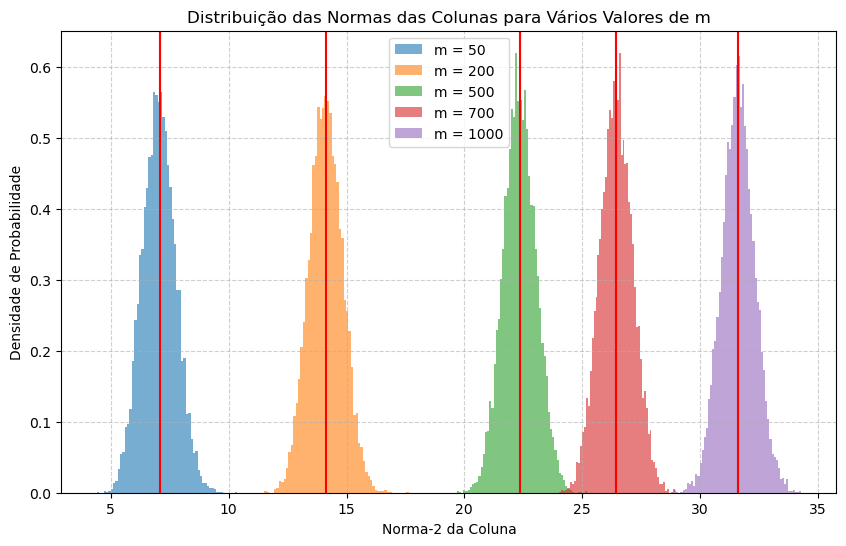

In [5]:
# Dimensões das matrizes
m_values = [ 50, 200, 500, 700, 1000]
n = 10000

# Plotando gráfico inicial
plt.figure(figsize=(10,6))

# Iterando para cada valor possível de m
for m in m_values:

   # Gerando a matriz e criando a sua lista da norma das colunas
   A = matrix(m, n)
   A_norms = []

   # Salvando a norma de cada coluna
   for column in range(A.shape[1]):
      A_norms.append(np.linalg.norm(A[:,column]))

   # Plotando o histograma das normas, e uma linha vertical da média
   plt.hist(A_norms, alpha = 0.6, label=f"m = {m}", bins=60, density=True)
   plt.axvline(x=np.sqrt(m), color = 'r')

# Detalhes a mais do plot
plt.title('Distribuição das Normas das Colunas para Vários Valores de m')
plt.xlabel('Norma-2 da Coluna')
plt.ylabel('Densidade de Probabilidade')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Por uma ***grande*** coincidência, matrizes aleatórias gaussianas possuem vetores cuja norma também representa uma distribuissão aproximadamente gaussiana.

Claro, na matemática não temos coincidências, e nesse caso a explicação é bem simples!
Cada elemento $A_{ij}$ de uma matriz $A_{m \times n}$ é uma variável aleatória $A_{ij} \sim \mathcal{N}(0,1)$, logo, $\mu(A_{ij}^2) = 1$.

Ora, a norma quadrada de um vetor $A_j$ nada mais é do que $||A_j||^2_2 = \sum^i A_{ij}^2$, ou seja, $\mu (||A_j||^2_2) = \sum^i 1 = m \therefore \mu (||A_j||_2) = \sqrt m$. 

As linhas vermelhas no gráfico indicam as médias $\sqrt m$ para cada quantidade de linhas testada. 

Podemos observar as distribuições melhor no gráfico abaixo:

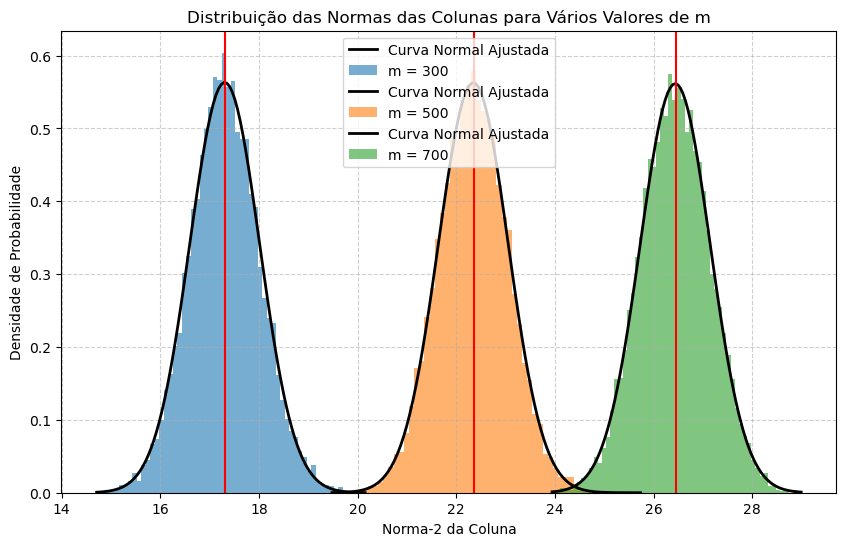

In [6]:
# Mesmo código anterior adicionando a curva normal


m_values = [300, 500, 700]
n = 10000

plt.figure(figsize=(10,6))

for m in m_values:
   A = matrix(m, n)
   A_norms = []

   for column in range(A.shape[1]):
      A_norms.append(np.linalg.norm(A[:,column]))
   
   # Aqui eu ploto uma curva normal fittada na lista de normas
   med, desv_pad = norm.fit(A_norms)
   x = np.linspace(min(A_norms), max(A_norms), 100) # Eixo de plotagem da curva
   p = norm.pdf(x, med, desv_pad)
   plt.plot(x, p, 'k', linewidth=2, label='Curva Normal Ajustada')


   plt.hist(A_norms, alpha = 0.6, label=f"m = {m}", bins=60, density=True)
   plt.axvline(x=np.sqrt(m), color = 'r')

plt.title('Distribuição das Normas das Colunas para Vários Valores de m')
plt.xlabel('Norma-2 da Coluna')
plt.ylabel('Densidade de Probabilidade')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### Exercício ***1.c)***

Vamos agora fazer o cálculo do valor máximo de $\dfrac{|\langle A_i , A_j \rangle|}{||A_i|| \cdot ||A_h||}$ para $1000$ matrizes $100 \times 300$

Iteração da matriz 0
Iteração da matriz 1
Iteração da matriz 2
Iteração da matriz 3
Iteração da matriz 4
Iteração da matriz 5
Iteração da matriz 6
Iteração da matriz 7
Iteração da matriz 8
Iteração da matriz 9
Iteração da matriz 10
Iteração da matriz 11
Iteração da matriz 12
Iteração da matriz 13
Iteração da matriz 14
Iteração da matriz 15
Iteração da matriz 16
Iteração da matriz 17
Iteração da matriz 18
Iteração da matriz 19
Iteração da matriz 20
Iteração da matriz 21
Iteração da matriz 22
Iteração da matriz 23
Iteração da matriz 24
Iteração da matriz 25
Iteração da matriz 26
Iteração da matriz 27
Iteração da matriz 28
Iteração da matriz 29
Iteração da matriz 30
Iteração da matriz 31
Iteração da matriz 32
Iteração da matriz 33
Iteração da matriz 34
Iteração da matriz 35
Iteração da matriz 36
Iteração da matriz 37
Iteração da matriz 38
Iteração da matriz 39
Iteração da matriz 40
Iteração da matriz 41
Iteração da matriz 42
Iteração da matriz 43
Iteração da matriz 44
Iteração da matriz 4

C:\Users\isaia\AppData\Local\Temp\ipykernel_35264\2689969179.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


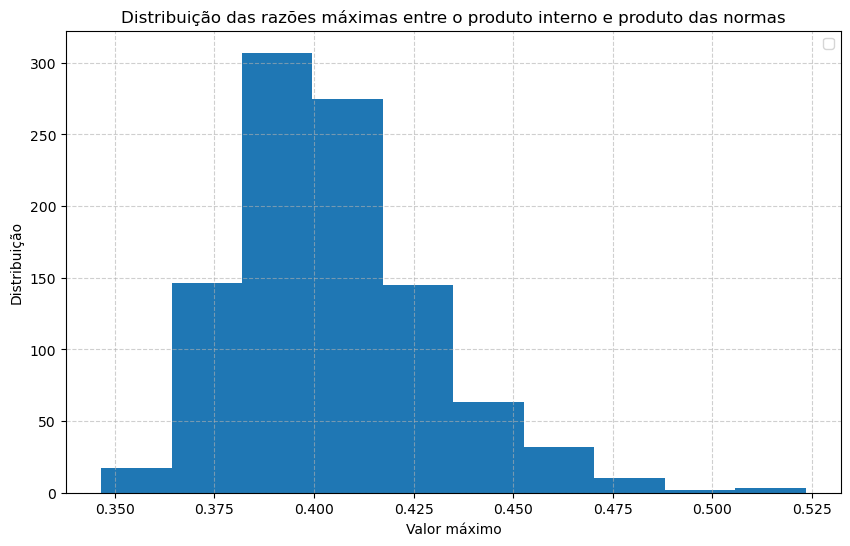

In [7]:
max_k = []

def value(vec1, vec2):
   return (np.inner(vec1, vec2))/(np.linalg.norm(vec1) * np.linalg.norm(vec2))

for _ in range(1000):
   A = matrix(100, 300)
   max_val = 0
   print(f"Iteração da matriz {_}")
   for i in range(A.shape[1]):
      for j in range(i+1, A.shape[1]):
         current_val = value(A[:,i], A[:,j])
         if current_val > max_val:
            max_val = current_val

   max_k.append(max_val)

plt.figure(figsize=(10,6))
plt.hist(max_k)
plt.title('Distribuição das razões máximas entre o produto interno e produto das normas')
plt.xlabel("Valor máximo")
plt.ylabel("Distribuição")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


### Exercício ***1.d)***

Vamos observar a complexidade desse algoritmo, iniciando pela função `value`:

* Primeiro calculamos o produto interno dos dois vetores, isso corresponde a $m$ produtos e $m-1$ somas, logo, uma complexidade $O(m)$
* Depois calculamos o produto das normas dos vetores, isto é, $2 \cdot (2m - 1)$ operações, logo, $O(m)$.

Portanto a função `value` tem complexidade $O(m)$.

O nosso loop 

```py
for i in range(A.shape[1]):
      for j in range(i+1, A.shape[1]):
```

está otimizado para reduzir a quantidade de operações, já que o valor de $j$ passa a ser contado a partir de $i+1$. A quantidade de operações para cada coluna $i$ será de $n - i$, o que é a soma de P.A:

$$
\sum_{i=0} ^n (n - i) = \frac{n^2 - n}{2}
$$

O que nos dá uma complexidade de $O(n^2)$.

Ora, se para cada uma dessas iterações executamos `value` uma vez, temos uma complexidade agregada de $O(n^2m)$.